In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

In [2]:
# Data Dictionary
products = {
    'p01': {'name': 'Refrigerator', 'image': 'refrigerator.jpg', 'rating': 4.5},
    'p04': {'name': 'Washing Machine', 'image': 'washing_machine.jpg', 'rating': 4.2},
    'p05': {'name': 'Dishwasher', 'image': 'dishwasher.jpg', 'rating': 4.8},
    'p06': {'name': 'Coffee Maker', 'image': 'coffee_maker.jpg', 'rating': 4.3},
    'p07': {'name': 'Toaster', 'image': 'toaster.jpg', 'rating': 4.0},
    'p08': {'name': 'Blender', 'image': 'blender.jpg', 'rating': 4.5},
    'p10': {'name': 'Air Purifier', 'image': 'air_purifier.jpg', 'rating': 4.6},
    'p11': {'name': 'Electric Kettle', 'image': 'electric_kettle.jpg', 'rating': 1.1},
    'p12': {'name': 'New Machine', 'image': 'new_machine.jpg', 'rating': 4.0}
}


df_initial = pd.DataFrame.from_dict(products, orient='index')
df_initial.index.name = 'pid'
df_initial.to_csv('products.csv')

print("File 'products.csv' created successfully!")

File 'products.csv' created successfully!


In [3]:

df = pd.read_csv('products.csv', index_col='pid')


print("--- First 5 Rows ---")
display(df.head()) 

--- First 5 Rows ---


,name,image,rating
pid,,,
p01,Refrigerator,refrigerator.jpg,4.5
p04,Washing Machine,washing_machine.jpg,4.2
p05,Dishwasher,dishwasher.jpg,4.8
p06,Coffee Maker,coffee_maker.jpg,4.3
p07,Toaster,toaster.jpg,4.0


In [6]:
def update_product_rating(pid, new_rating):
    if pid in df.index:
        df.loc[pid, 'rating'] = new_rating
        df.to_csv('products.csv')
        print(f"Updated {pid} rating to {new_rating}")
    else:
        print("Product not found")

def delete_product(pid):
    global df
    if pid in df.index:
        df = df.drop(pid)
        df.to_csv('products.csv')
        print(f"Deleted product {pid}")
    else:
        print("Product not found")

In [ ]:
# p01 ki rating change karke 4.9 karein
update_product_rating('p01', 4.9)

# Agar kuch delete karna ho to neeche wali line uncomment karein
# delete_product('p12')

In [8]:

np.random.seed(42) 
df['price'] = np.random.randint(80, 1200, size=len(df))


print("--- Products cheaper than 100 ---")
display(df[df['price'] < 100])


print(f"Shape: {df.shape}")
print("Missing Values:\n", df.isnull().sum())

--- Products cheaper than 100 ---


,name,image,rating,price
pid,,,,


Shape: (9, 4)
Missing Values:
 name      0
image     0
rating    0
price     0
dtype: int64


In [9]:

print("--- Sorted Data ---")
display(df.sort_values(by='rating', ascending=False))

# New Math Columns
df['rating_squared'] = df['rating'] ** 2
df['is_low_rated'] = df['rating'] < 2

# Rename and Drop Image Column
df = df.rename(columns={'image': 'img_path'})
df = df.drop(columns=['img_path'])


df_reset = df.reset_index()
df = df_reset.set_index('pid')

print("Cleanup Complete. Current Columns:", df.columns.tolist())

--- Sorted Data ---


,name,image,rating,price
pid,,,,
p01,Refrigerator,refrigerator.jpg,4.9,940
p05,Dishwasher,dishwasher.jpg,4.8,1124
p10,Air Purifier,air_purifier.jpg,4.6,167
p08,Blender,blender.jpg,4.5,410
p06,Coffee Maker,coffee_maker.jpg,4.3,201
p04,Washing Machine,washing_machine.jpg,4.2,1175
p07,Toaster,toaster.jpg,4.0,546
p12,New Machine,new_machine.jpg,4.0,210
p11,Electric Kettle,electric_kettle.jpg,1.1,951


Cleanup Complete. Current Columns: ['name', 'rating', 'price', 'rating_squared', 'is_low_rated']


In [10]:
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
std_rating = df['rating'].std()

print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Std Dev: {std_rating:.2f}")

Mean Rating: 4.04
Median Rating: 4.30
Std Dev: 1.15


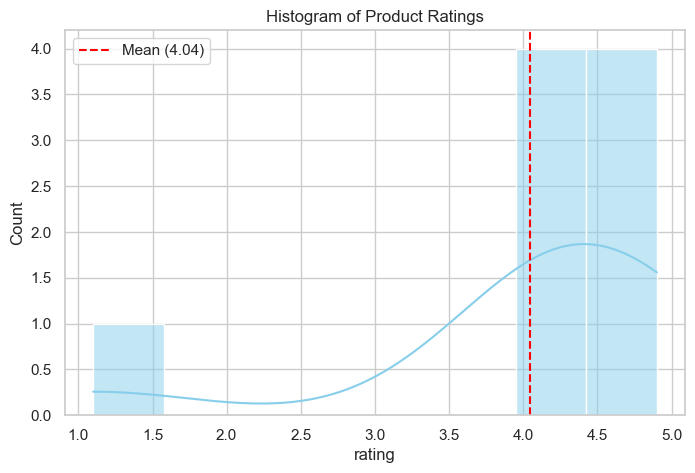

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=8, kde=True, color='skyblue')
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean ({mean_rating:.2f})')
plt.title('Histogram of Product Ratings')
plt.legend()
plt.show()

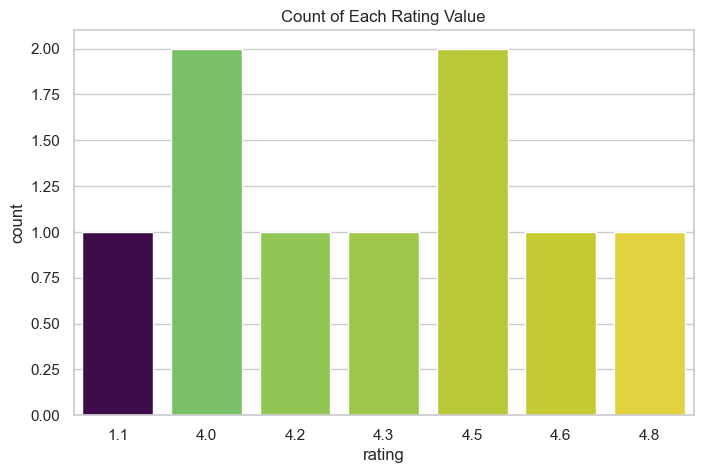

In [9]:
plt.figure(figsize=(8, 5))

sns.countplot(x='rating', data=df, hue='rating', palette='viridis', legend=False)
plt.title('Count of Each Rating Value')
plt.show()

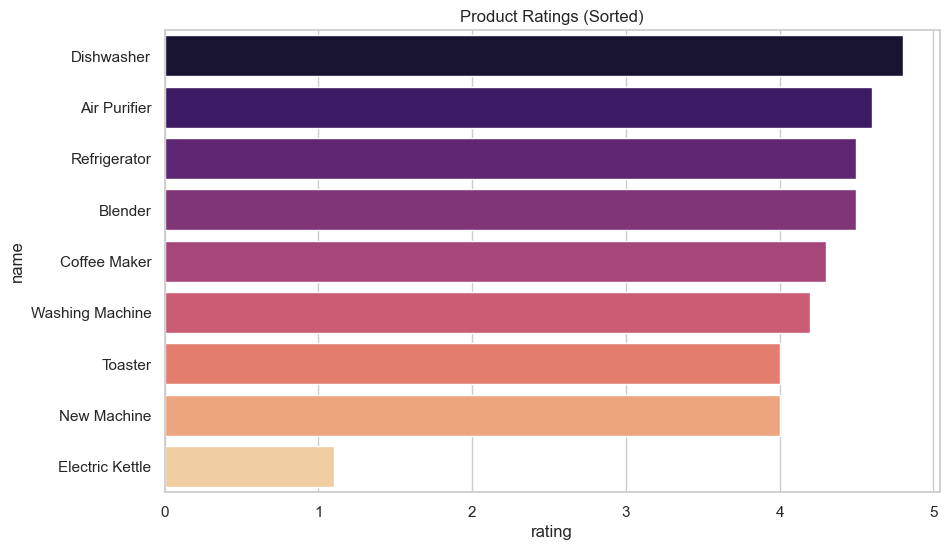

In [10]:
plt.figure(figsize=(10, 6))
sorted_df = df.sort_values('rating', ascending=False)


sns.barplot(x='rating', y='name', data=sorted_df, hue='name', palette='magma', legend=False)
plt.title('Product Ratings (Sorted)')
plt.show()

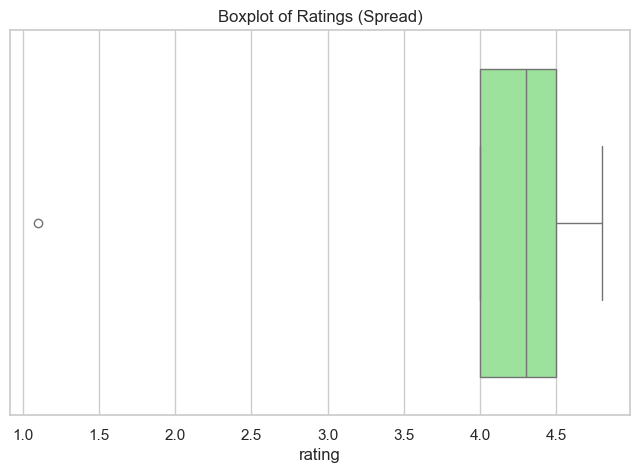

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['rating'], color='lightgreen')
plt.title('Boxplot of Ratings (Spread)')
plt.show()